<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 2- Exploratory Data Analysis

### _EDA for "Ideas" DataFrame compiled in Notebook 1_

---
### Notebook Summary 
> - Checking for null or duplicated values
> - Datatype conversion utilizing the Pandas "datetime" functionality
> - Filtering out incorrect 'Ticker' lengths 'Editor's Picks'
> - Investigating feature frequencies, distributiins, and summary statistics 
> - Creating Long and Short Portfolios 
> - Compiling "Final Ideas" DataFrame, saving and exporting as csv file for accessibility throughout the remainder of the notebooks

- Leveraging the Pandas library to compile 'Final Ideas' Dataframe that will be exported as a csv file to be used in subsequent notebooks.

---
### _Importing Necessary Libraries_
---

In [1]:
# EDA/Data Mining
import pandas as pd
import numpy as np


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Setting style
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### _Importing "Ideas" Dataframe_
----

In [2]:
ideas = pd.read_csv('ideas_df.csv')  # Compiled via webscrape in Notebook 1

In [3]:
ideas.head(3)  # Inspecting head 

,Authors,Link,Tickers,Time,Title,Strategy
0,FIG Ideas,/article/4137554-wells-fargo-matters-2018,WFC,"Mon, Jan. 15, 8:57 AM",Wells Fargo: What Matters For 2018?,Long
1,Nick Cox,/article/4137546-energy-storage-can-drive-futu...,TSLA,"Mon, Jan. 15, 8:21 AM","Energy Storage Can Drive Future Tesla Growth, ...",Long
2,Long Player,/article/4137548-baytex-energy-prize-winning-f...,BTE,"Mon, Jan. 15, 8:19 AM",Baytex Energy: Prize Winning Or Flea Bitten - ...,Long


### _Checking for null or duplicated data_
----

In [4]:
ideas.isnull().sum() # Checking for missing data

Authors     10
Link         0
Tickers      0
Time         0
Title        0
Strategy     0
dtype: int64

In [5]:
ideas.duplicated().sum()  # Checking for duplicated data 

1

In [6]:
ideas.dropna(inplace=True)  # Dropping null values 
ideas.drop_duplicates(inplace=True)  # Dropping duplicate values

### _Converting Datatypes_
---
- The majority of columns will be analyzed categorically, meaning there is no need to convert them from objects

In [7]:
ideas.dtypes  # Inspecting datatypes 

Authors     object
Link        object
Tickers     object
Time        object
Title       object
Strategy    object
dtype: object

- In order to interpret data properly with a timseries functionality, the 'Time' column will need to be converted to a `datetime` `object`, shown below : 

In [8]:
ideas['Time'] = pd.to_datetime(ideas['Time'],errors='coerce') # Converting Time to Pandas datetime objects

In [9]:
# Dropping null values that may have arisen 
# Inspecting progress

ideas.dropna(inplace=True)
ideas.isnull().sum()

Authors     0
Link        0
Tickers     0
Time        0
Title       0
Strategy    0
dtype: int64

### _Addressing Stock Tickers_
---
- Via Quora, the maximum length for stock tickers is 5 characters. Ensure the results of the webscrape and dataframe transformation are correct by filtering out tickers that do not meet this requirement through an engineered function.

In [10]:
# Engineering function to identify incorrect ticker lengths 

def transform_tickers(x):  
    if len(x) <= 5: # If length is less than or = to 5 characters 
        return(x)  # If satisfactory- return ticker
    else:
        return(np.nan) # Otherwise- return null value- to be dropped 

ideas['Tickers'] = ideas['Tickers'].apply(transform_tickers) # Applying to 'Tickers'

### _Addressing Editor's Picks_
---
- This project is based upon analyzing crowd-sourced analyses on Seeking Alpha. Because Editor's Picks do not necessarily meet this criteria they will be excluded when building machine learning algorithms judging analyses' accuracy. 

In [11]:
# Utilizing Regular Expressions and slicing to exclude 'Editor's Picks' from DataFrame 

ideas['Tickers'].replace(regex=True,inplace=True,to_replace=r'[^\w ]',value=r'') # Removing apostrophe 
ideas = ideas[ideas.Tickers != 'Editors Pick '] # Subsetting 

### _Investigating Summary Statistics_
---
### What is the scope of the "Ideas" data collected?
> - There are an ample amount of observations present for the construction and training of machine learning algorithms 
> - The feature set - including "Tickers" and "Authors" - are highly diversified. Due to lack of time and computational power, narrowing down their scope through investigating distributions and frequencies will be crucial. This will be accomplished by creating both a Long and Short Portfolio. 

In [12]:
print("="*45)
print('Number of articles/observations     : ' ,len(ideas))
print('Number of stock tickers referenced  : ', len(ideas['Tickers'].value_counts()))
print('Number of authors                   : ', len(ideas['Authors'].value_counts()))

Number of articles/observations     :  13345
Number of stock tickers referenced  :  2785
Number of authors                   :  1933


### What strategy type is recommended most?
> - The majority of analysts and industry experts are recommending Long Ideas. For the dataset provided (January 2017-2018), Long Ideas outnumbered Short Ideas by almost 9 times, presented via value count innvestigation and bar graph visualization below. 
> - Interesting Note: To access long idea articles from January of last year, I had to scrape back 235 pages! (only 28 for short ideas)_

In [13]:
print('Long Ideas   : ', ideas['Strategy'].value_counts().values[0])
print('Short Ideas  : ', ideas['Strategy'].value_counts().values[1])

Long Ideas   :  11983
Short Ideas  :  1362


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

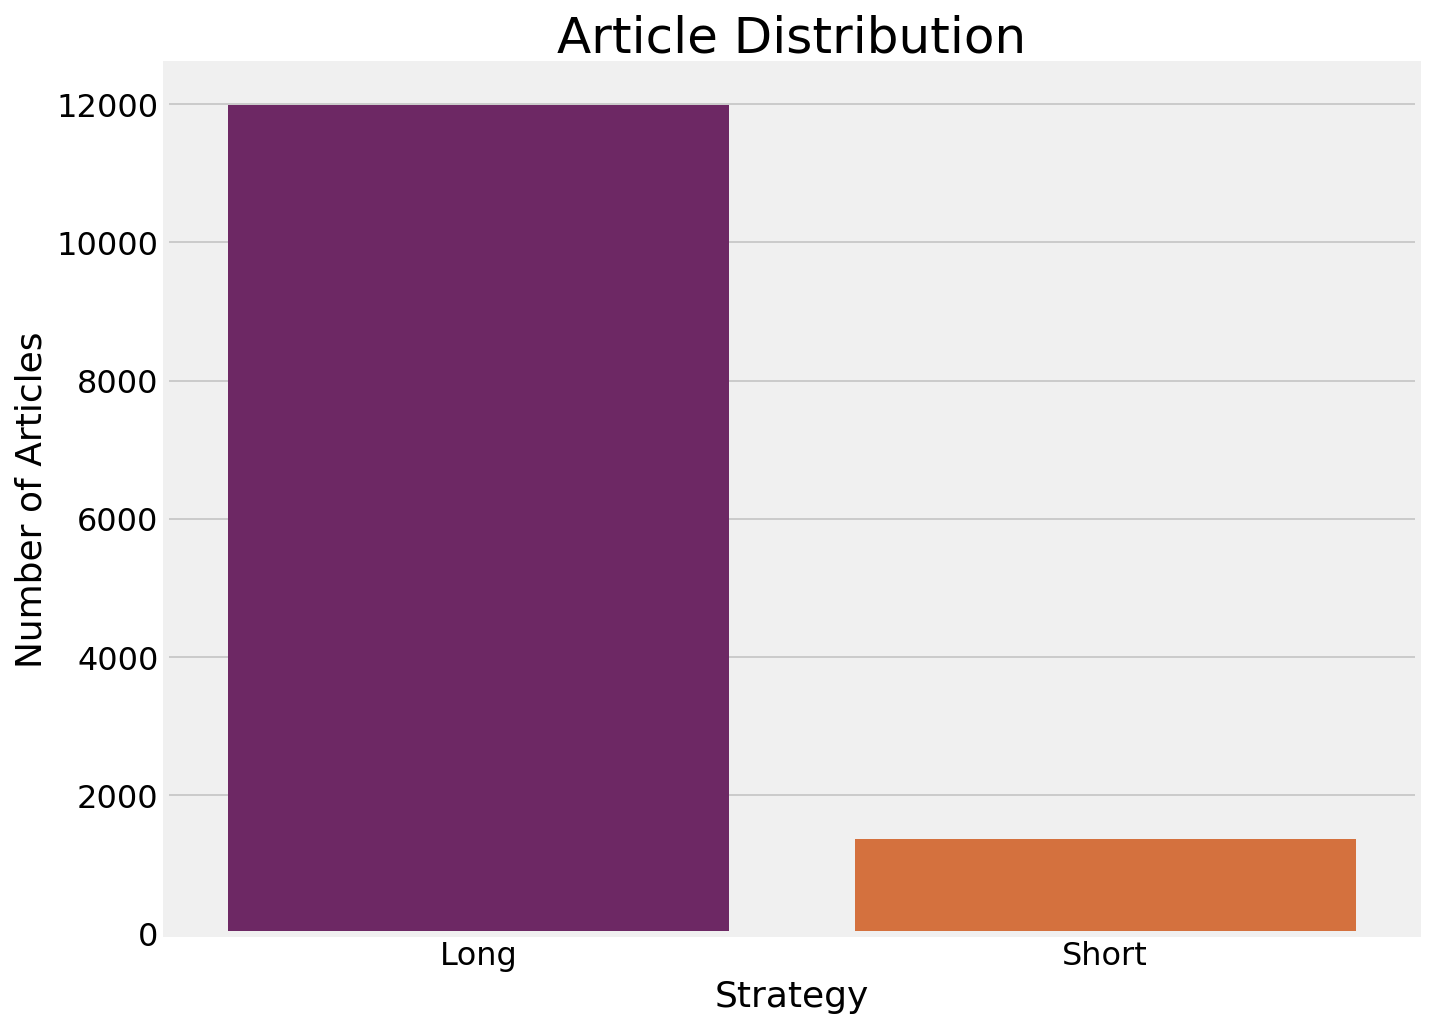

In [14]:
# Plotting bar graph to visualize 

plt.figure(figsize=(10,8))
sns.barplot(x = ideas['Strategy'].value_counts().index,
            y = ideas['Strategy'].value_counts().values,
           palette='inferno')

plt.title('Article Distribution',fontsize=25)
plt.xlabel('Strategy',fontsize=18)
plt.ylabel('Number of Articles',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### What stock tickers are referenced most frequently? 
> - 40 most frequent in descending order

In [15]:
print('Most Referenced Stocks : ')
print('===========================')
print(ideas['Tickers'].value_counts().head(40))

Most Referenced Stocks : 
TSLA    482
AAPL    273
AMD     165
AMZN    154
FB      123
BAC     116
NVDA    111
MU      101
GE      100
GILD     94
DRYS     91
VRX      84
CHK      79
DIS      77
F        74
BB       73
MSFT     70
NFLX     67
SBUX     66
XOM      65
SNAP     64
M        61
GM       61
CMG      60
WMT      60
INTC     59
IBM      58
GNC      55
TGT      55
NKE      52
KR       50
QCOM     50
COP      49
TEVA     48
SHOP     48
BA       46
BABA     46
FCX      44
T        42
COST     42
Name: Tickers, dtype: int64


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

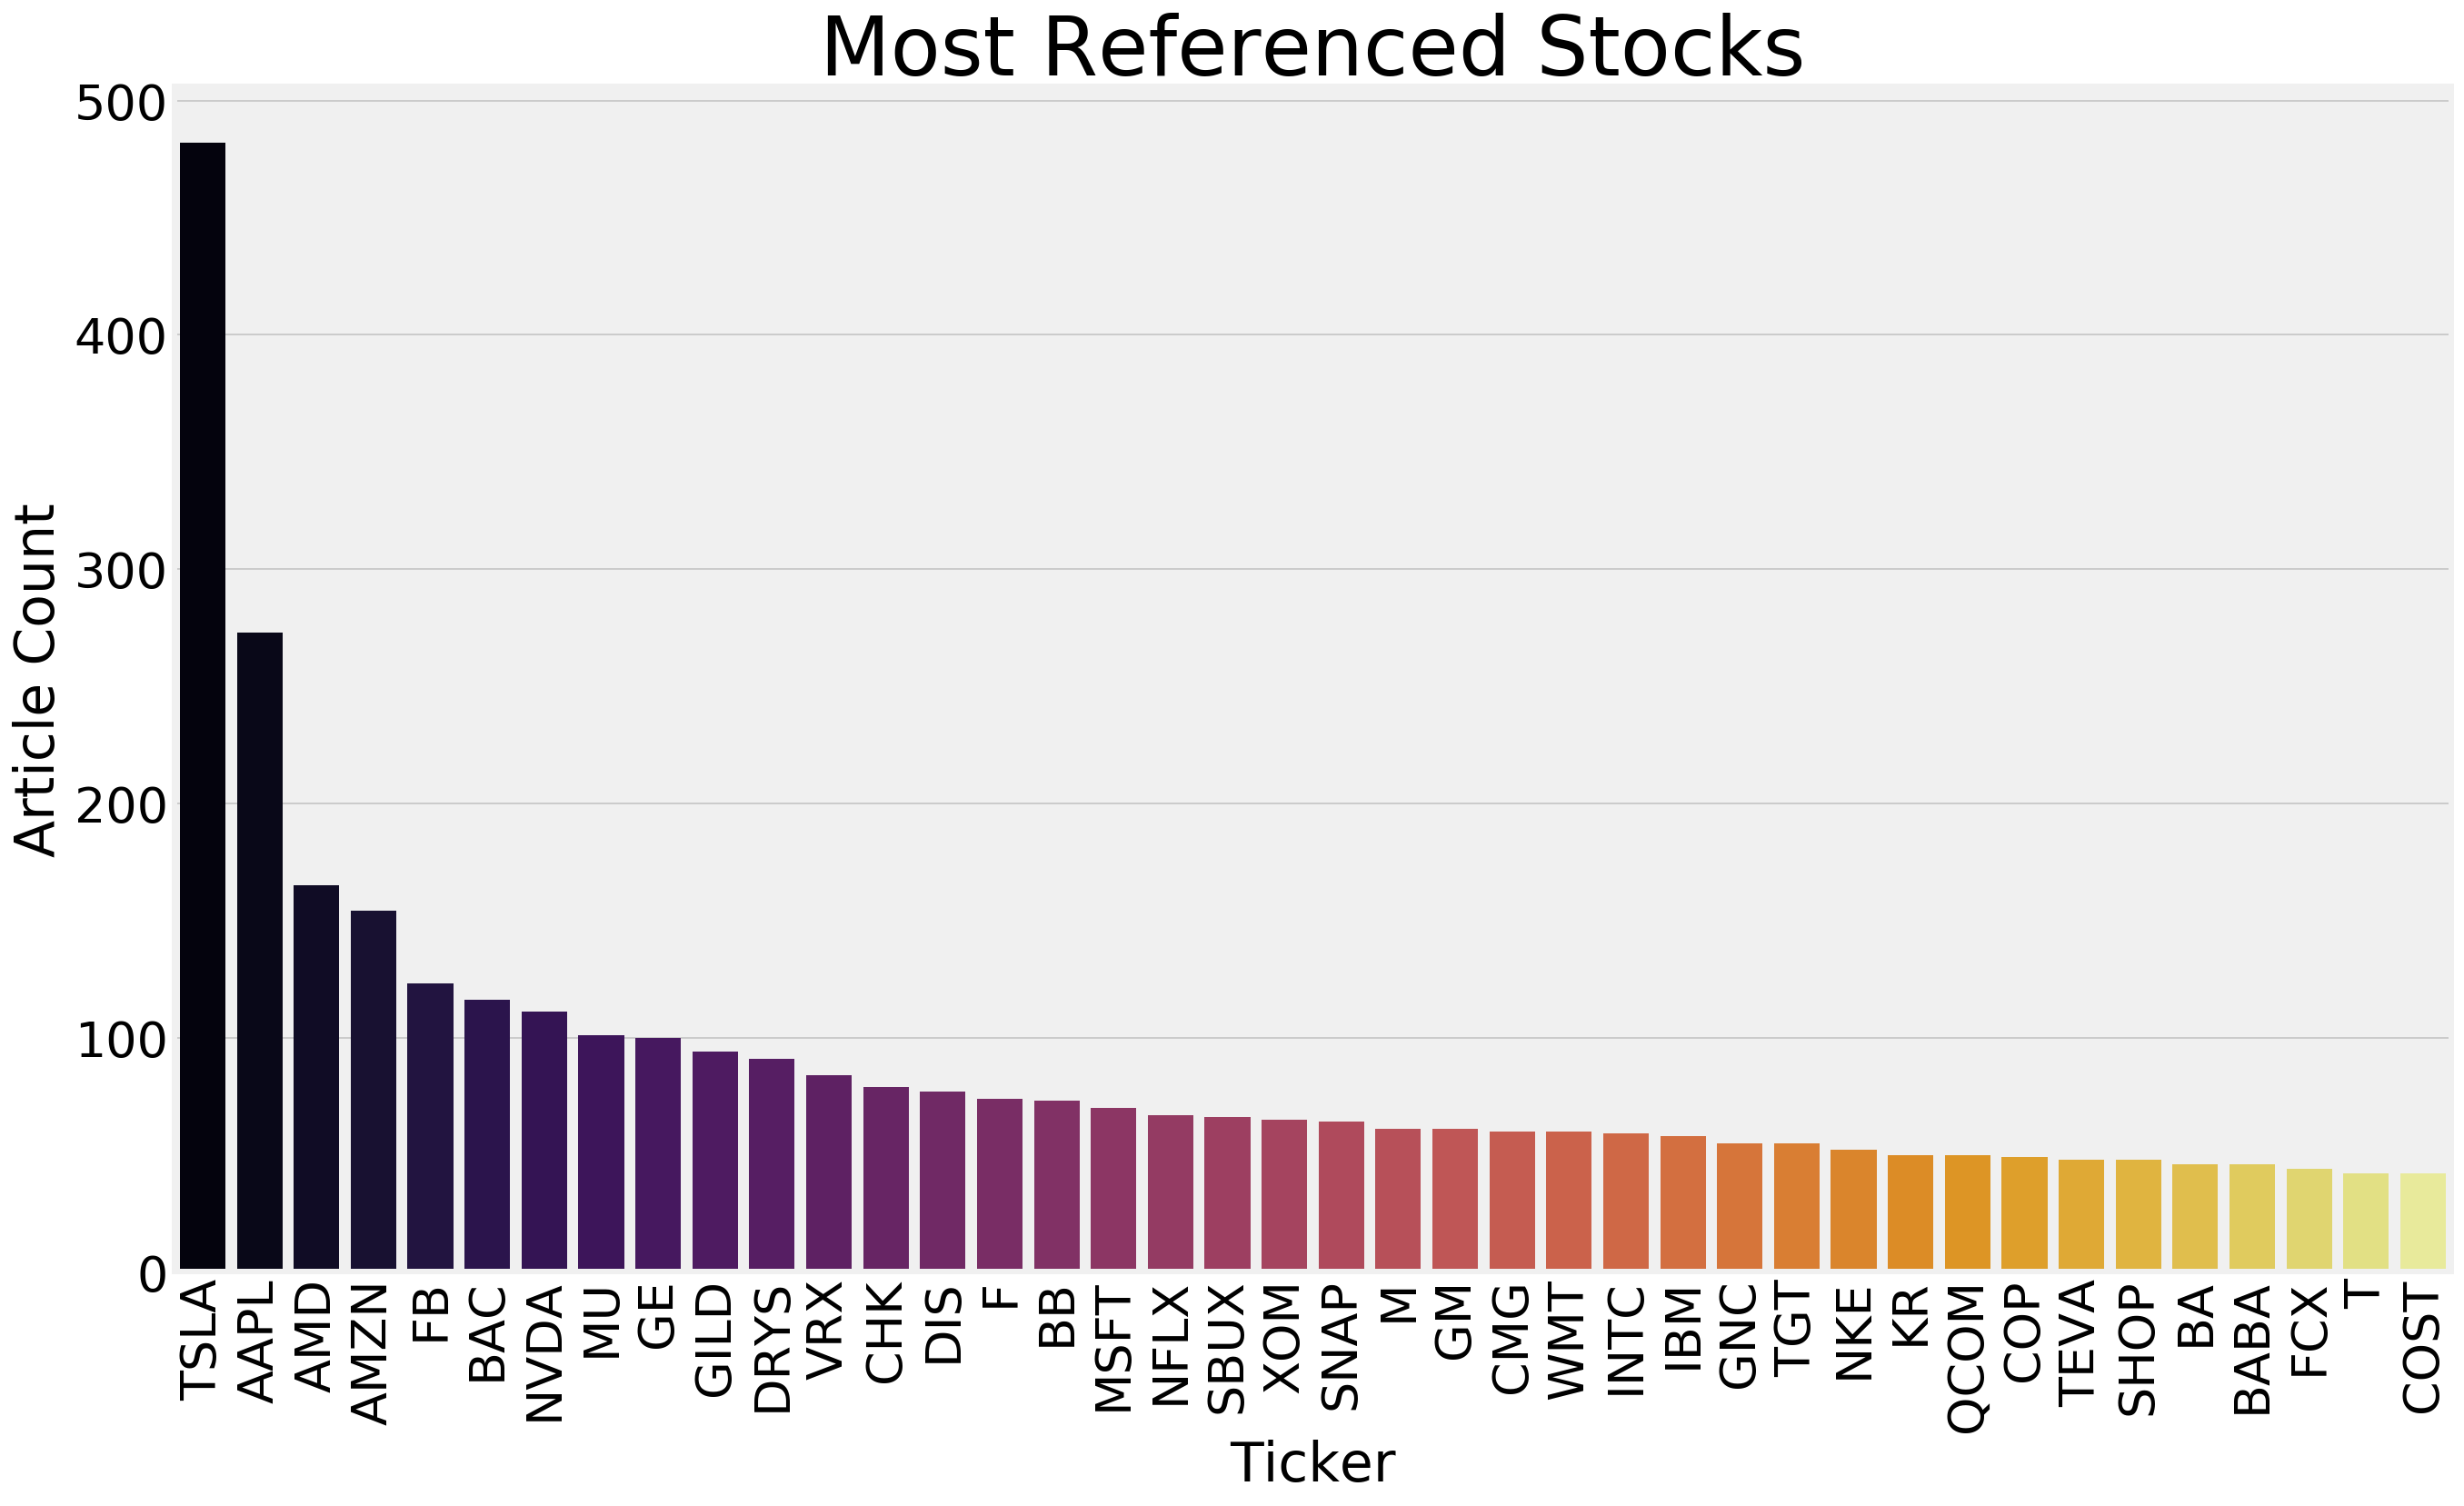

In [16]:
# Plotting bar graph to visualize 

plt.figure(figsize=(20,12))
sns.barplot(x = ideas['Tickers'].value_counts().head(40).index,
           y = ideas['Tickers'].value_counts().head(40).values,
           palette = 'inferno')


plt.title('Most Referenced Stocks',fontsize=45)
plt.xlabel('Ticker',fontsize=30)
plt.ylabel('Article Count',fontsize=30)
plt.xticks(fontsize=27,rotation=90)
plt.yticks(fontsize=27)

### How frequently are stock tickers referenced? 
- Investigating distribution for stock ticker frequency :
> - More than 50% of tickers are mentioned 2 times or less
> - More than 75% of tickers are mentioned 5 times ot less 
> - Potential Reasoning : The authors submitting to Seeking Alpha are likely following trends. Who wants to take the time to write something nobody reads (or doesn't even get posted!)? The stocks they pick to write about are certainly somewhat biased from the very beginning.

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text yticklabel objects>)

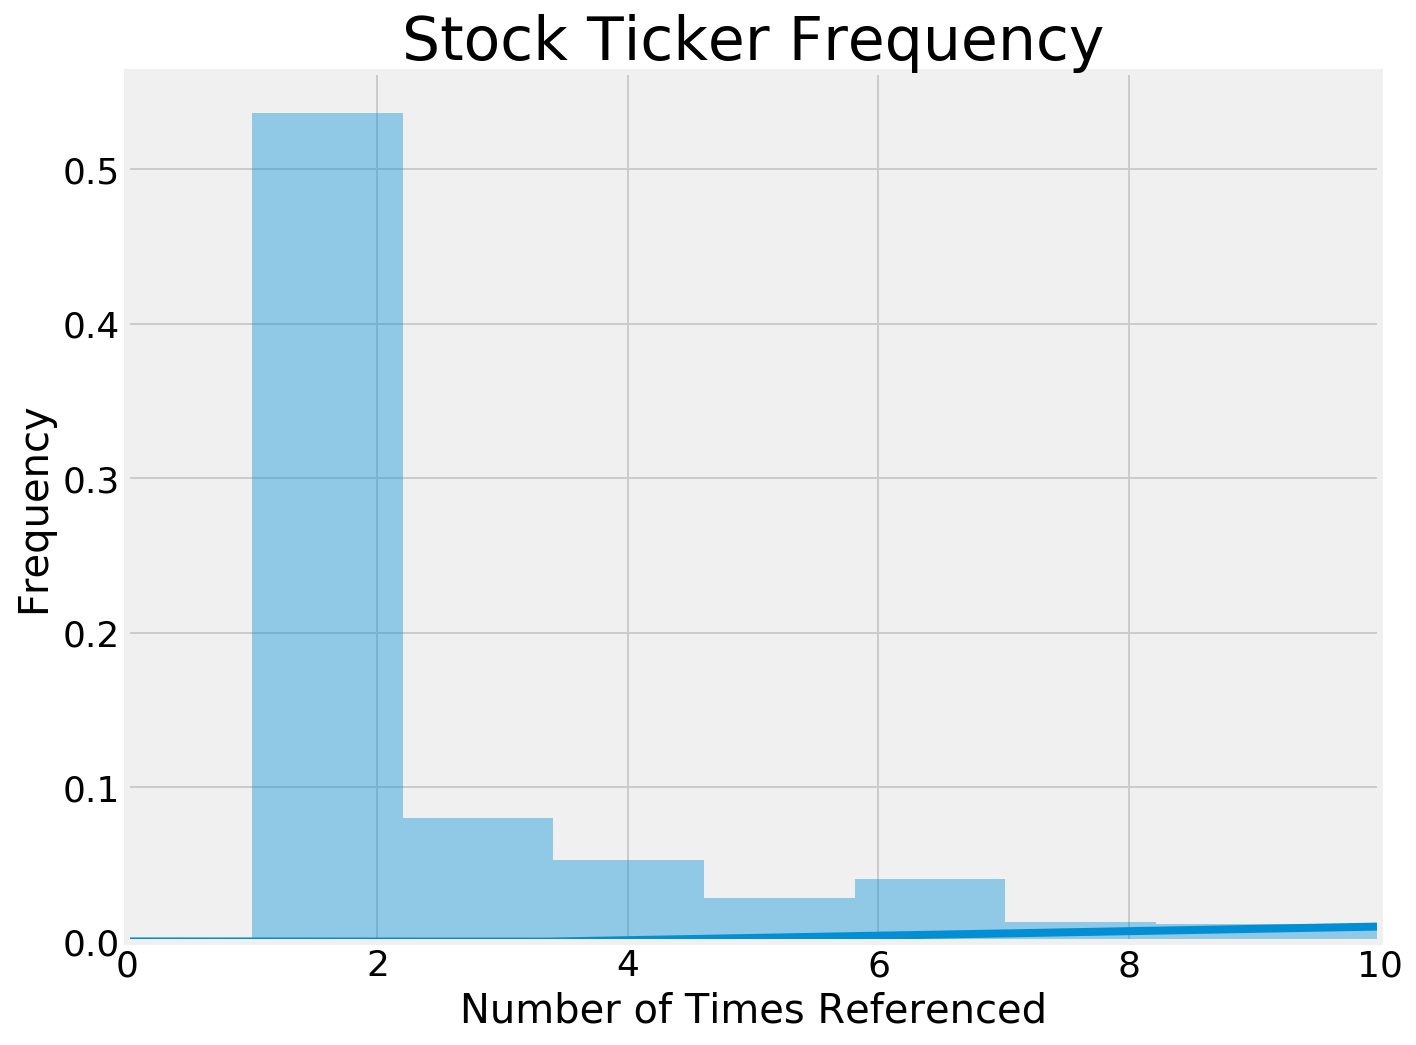

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(ideas['Tickers'].value_counts(), 
             bins=400)

plt.title('Stock Ticker Frequency',fontsize=30)
plt.xlabel('Number of Times Referenced',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xlim(0,10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [18]:
# Bar graph to visualize 
plt.figure(figsize=(75,60))
sns.barplot(x = ideas['Tickers'].value_counts().head(250).index,
           y = ideas['Tickers'].value_counts().head(250).values)

plt.xlabel('9% of Tickers Shown',fontsize=150)
plt.ylabel('Frequency',fontsize=150)
plt.ylim(0,270)
plt.title('Stock Ticker Frequency',fontsize=200)
plt.xticks([])
plt.yticks(fontsize=11)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

### _Creating Long and Short Portfolios_

> - Subsetting the dataset to include more frequently referenced stocks will narrow our scope tremendously and successfully capture the majority of the data. 
> - HOWEVER, it is crucial to retain data from both types of ideas, so subsetting the dataframe solely on ticker frequenices could be troublesome.
> - By creating a Long and Short Portfolio and performing subsets following the same logic we will successfully sidestep this potential problem. 

### Long Portfolio

In [55]:
# Subetting "Ideas" for long ideas 

long_portfolio = ideas[ideas['Strategy']=='Long'] 

In [56]:
# Grabbing 25 most frequently referenced 'Tickers'
# Transforming index/values into dataframe

long_portfolio = pd.DataFrame(long_portfolio.groupby('Tickers').Tickers.count().sort_values(ascending=False).head(25))
print('Long Portfolio:')
print('===============')
long_portfolio

Long Portfolio:


,Tickers
Tickers,
AAPL,250
TSLA,158
AMD,143
AMZN,136
FB,121
BAC,115
GE,97
MU,96
GILD,92


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

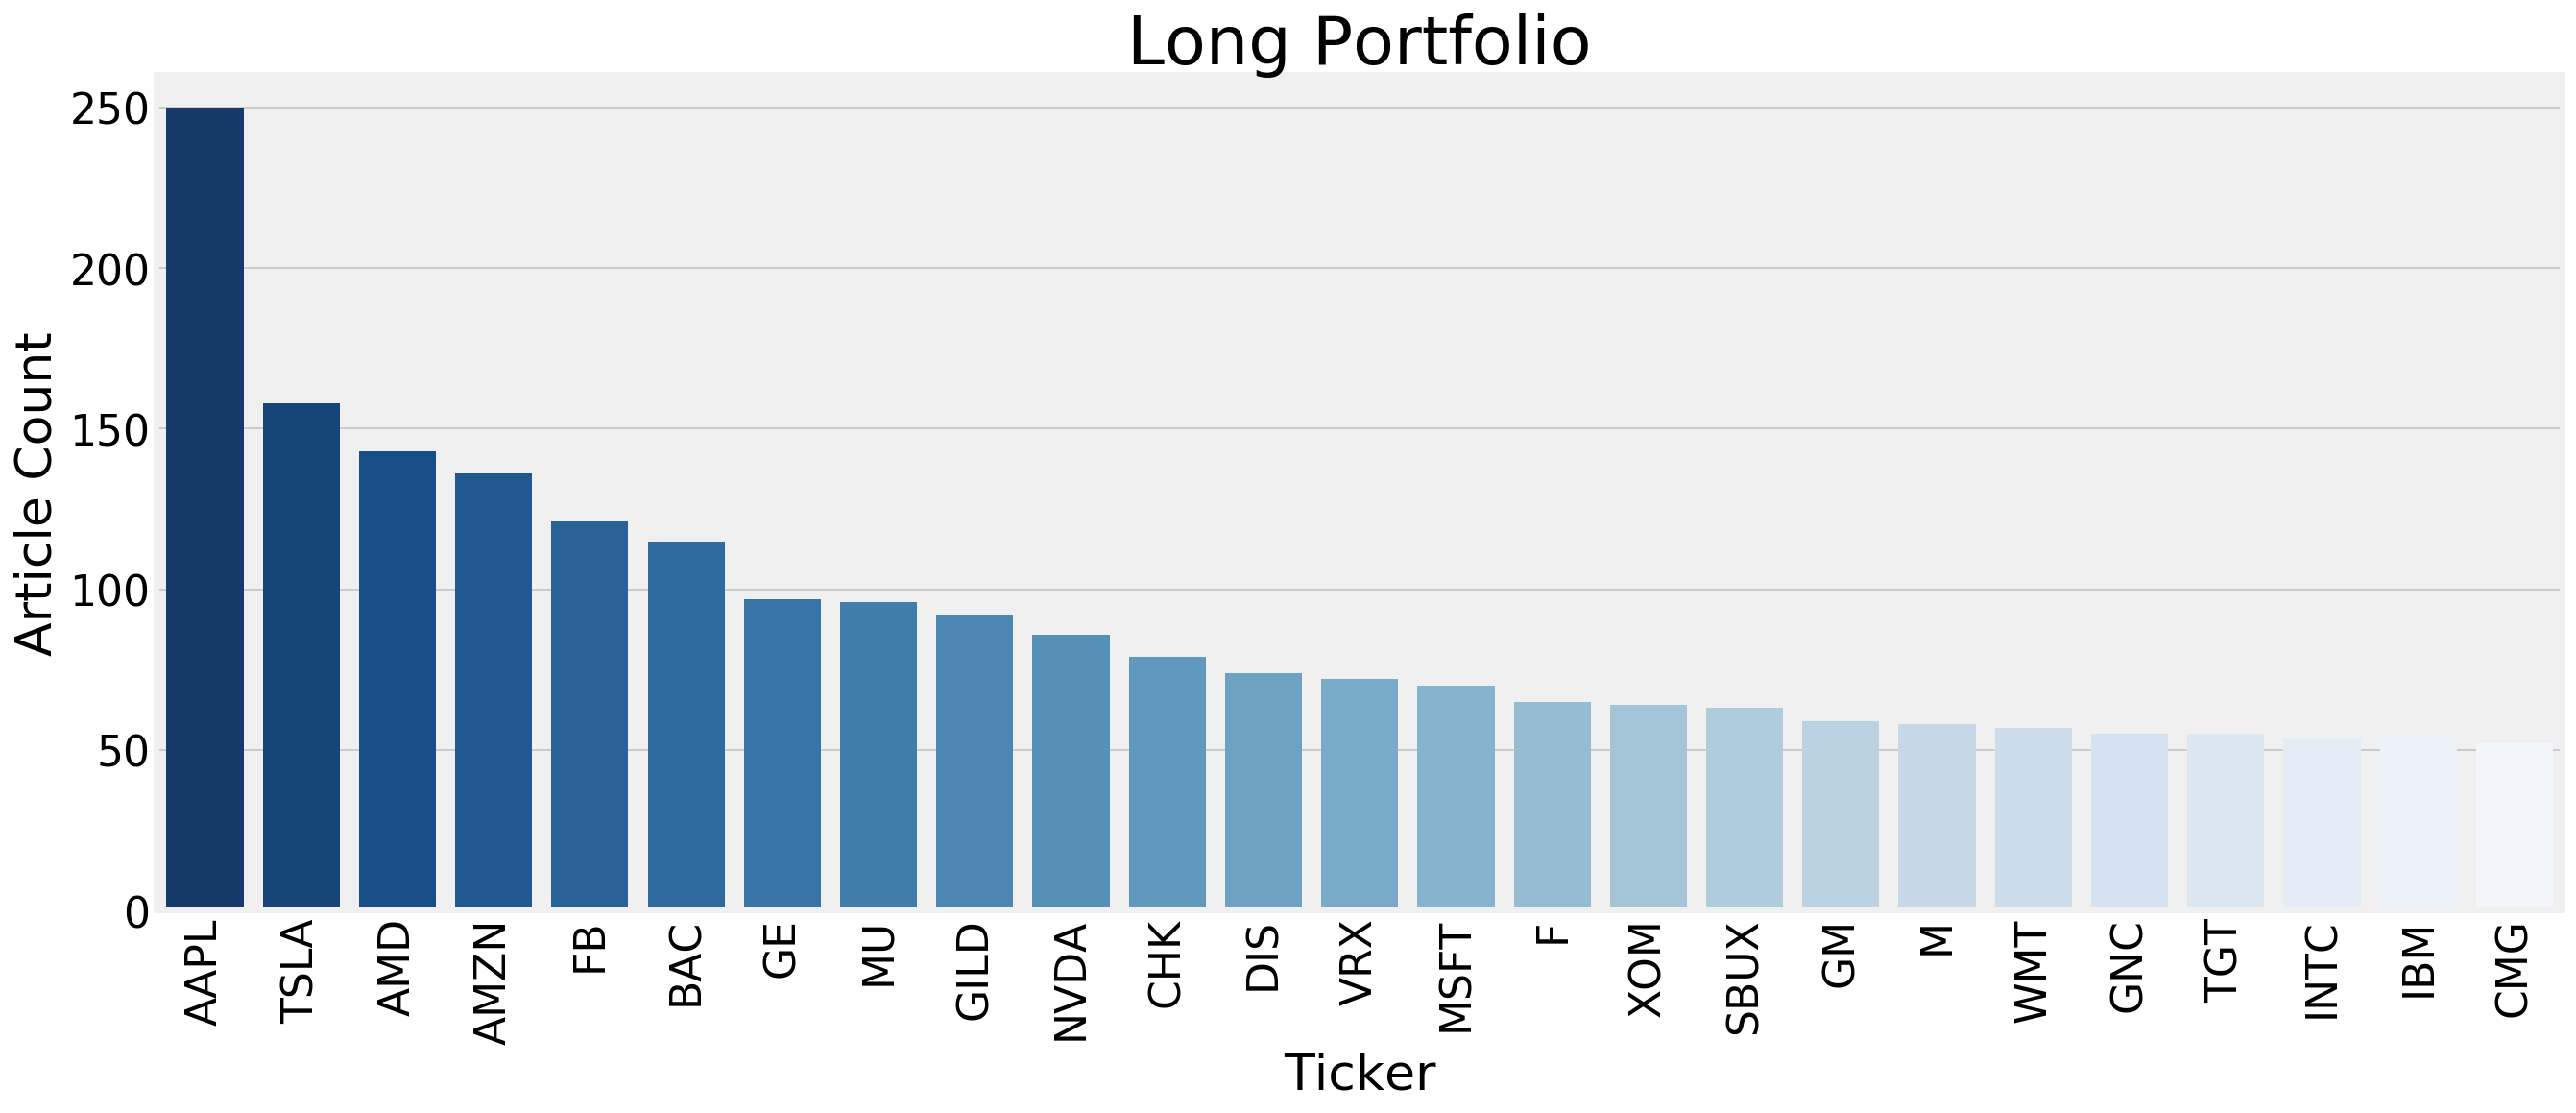

In [57]:
# Creating bar graph to visualize Long Portfolio

x = long_portfolio_list.index
y = long_portfolio_list.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Blues_r')

plt.xlabel('Ticker',fontsize=26)
plt.ylabel('Article Count',fontsize=26)
plt.ylim(0,260)
plt.title('Long Portfolio',fontsize=35)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)

### Short Portfolio

In [59]:
# Subetting "Ideas" for short ideas 

short_portfolio = ideas[ideas['Strategy']=='Short'] # Subset of dataframe into short ideas 

In [60]:
# Grabbing 25 most frequently referenced 'Tickers'
# Transforming index/values into dataframe

short_portfolio = pd.DataFrame(short_portfolio.groupby('Tickers').Tickers.count().sort_values(ascending=False).head(25))
print('Short Portfolio:')
print('===============')
short_portfolio

Short Portfolio:


,Tickers
Tickers,
TSLA,324
DRYS,48
SNAP,32
BB,30
NFLX,27
NVDA,25
AAPL,23
AMD,22
AMZN,18


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

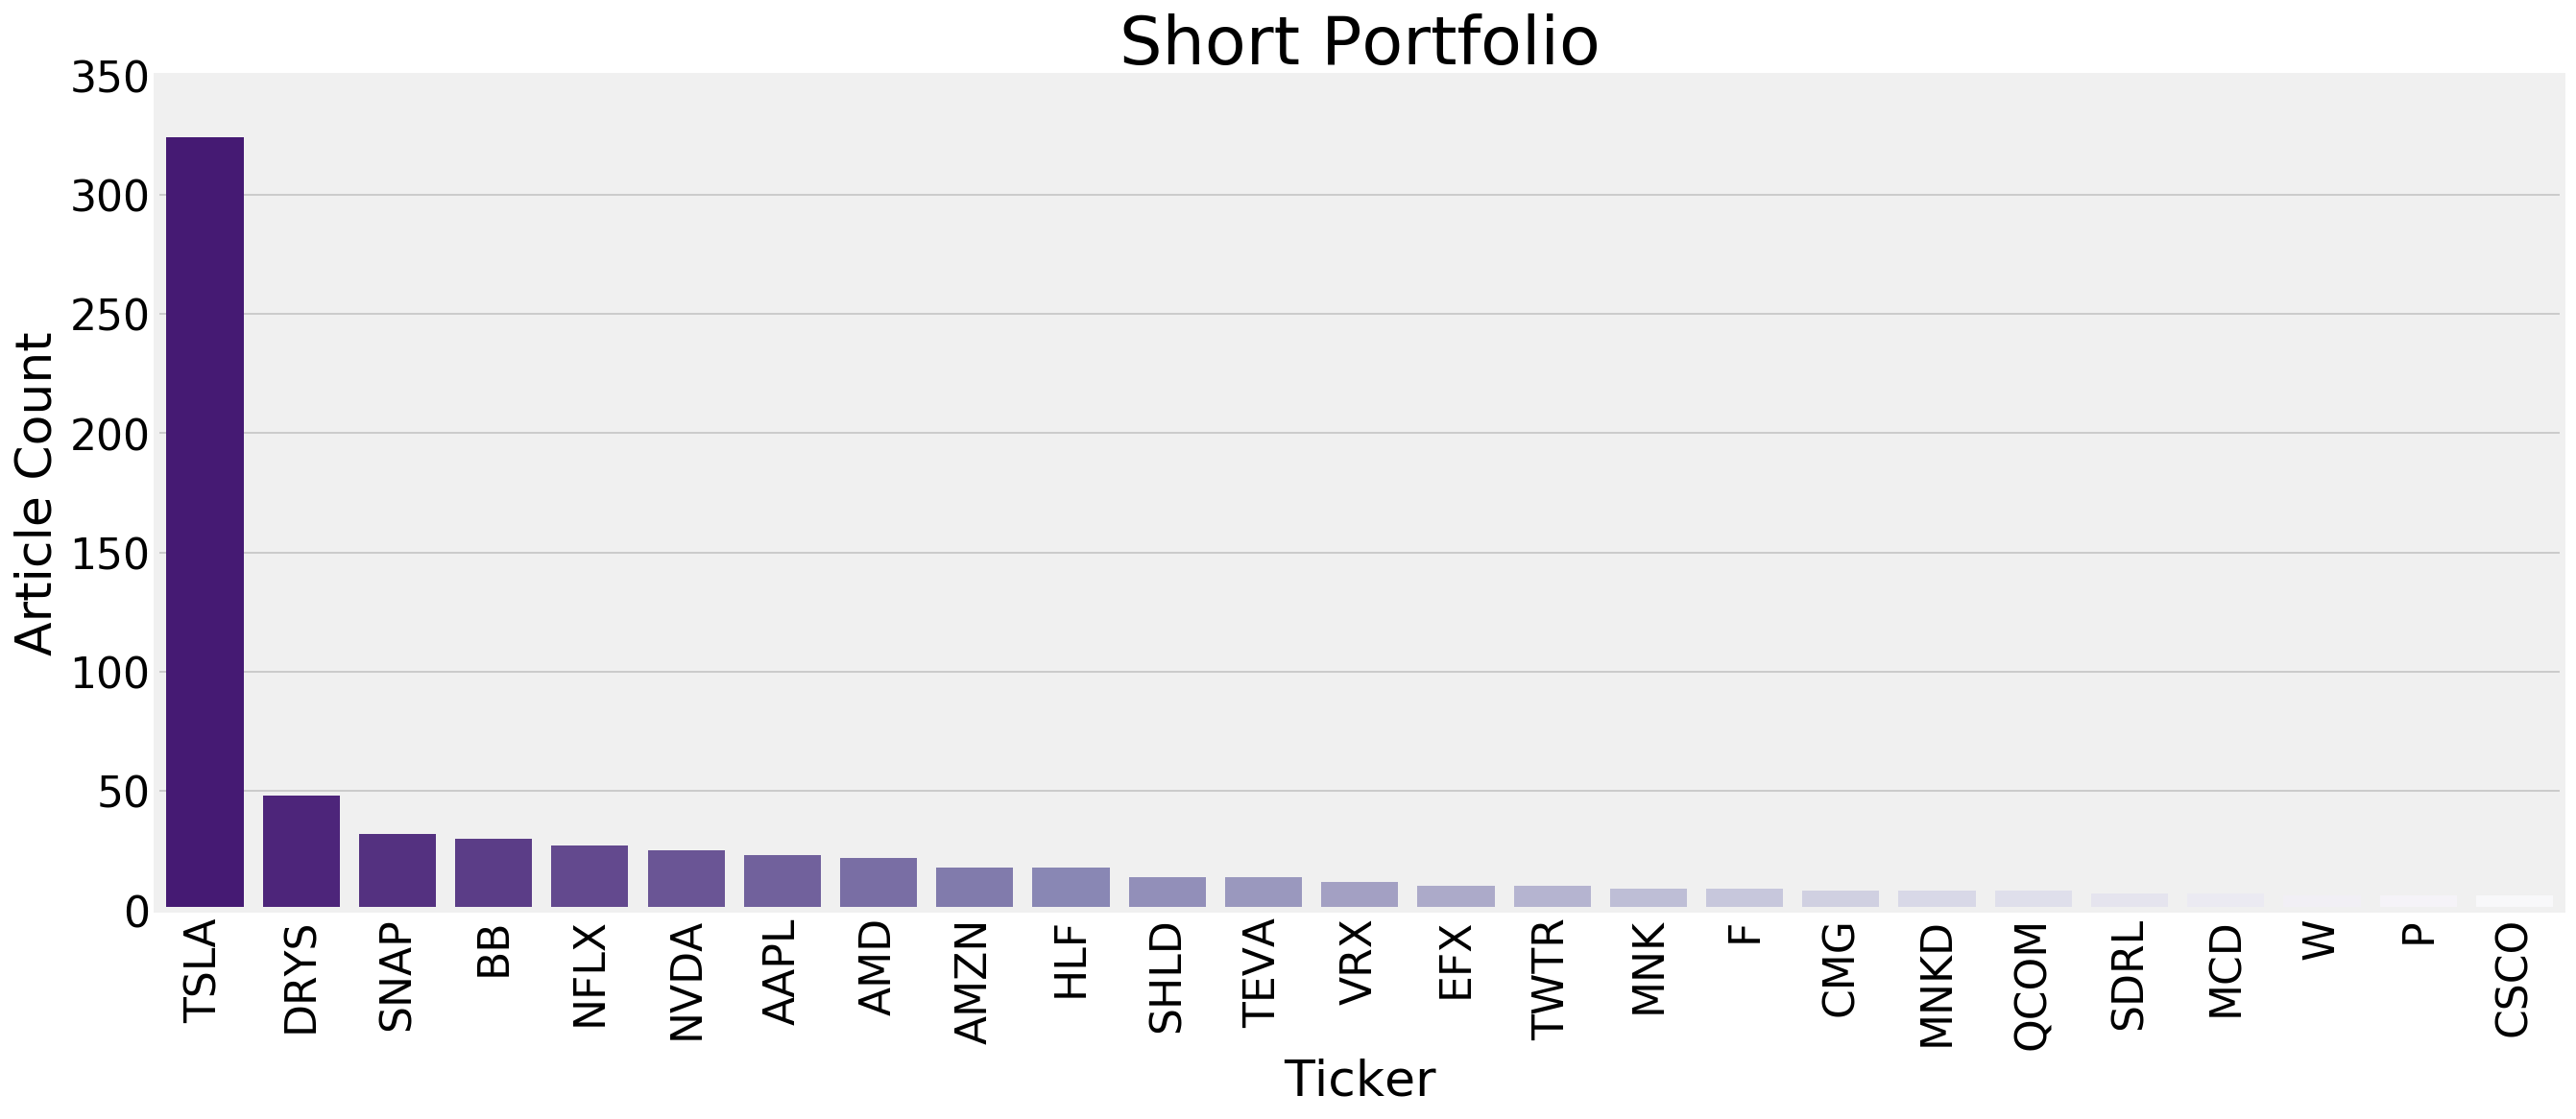

In [61]:
# Creating bar graph to visualize Short Portfolio

x = short_portfolio_list.index
y = short_portfolio_list.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Purples_r')

plt.xlabel('Ticker',fontsize=26)
plt.ylabel('Article Count',fontsize=26)
plt.ylim(0,350)
plt.title('Short Portfolio',fontsize=35)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)

---
## Saving Results - Exporting "Long Portfolio" & "Short Portfolio" DataFrames as CSVs
---

In [65]:
# Exporting as csvs

long_portfolio.to_csv('long_portfolio.csv')
short_portfolio.to_csv('short_portfolio.csv')

## Onwards!
## Please proceed to Notebook 3 :)  